# Band Pass Filter Response Plot

*Schematic*

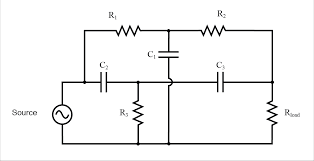

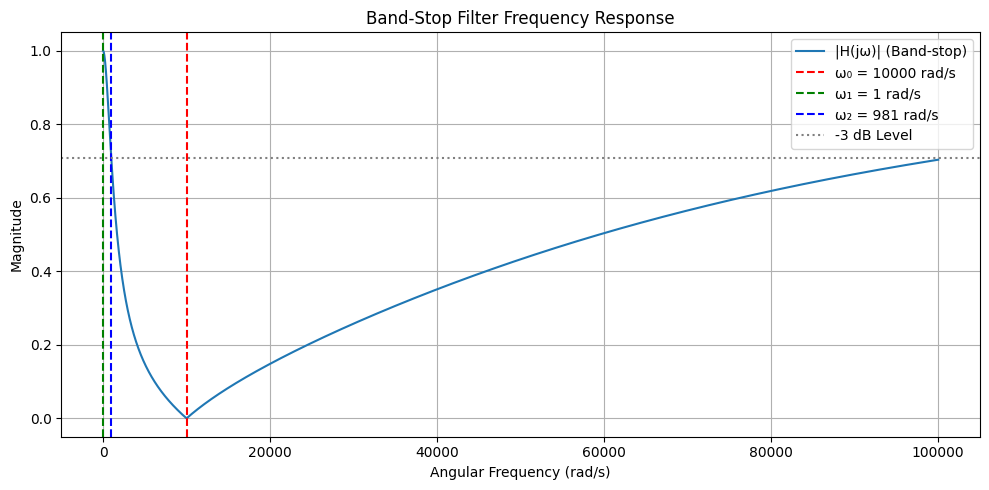

Notch (ω₀): 10000.00 rad/s | 1591.55 Hz
Cutoff ω₁: 1.00 rad/s
Cutoff ω₂: 981.19 rad/s


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# RLC values
R = 1e3        # 1 kOhm
C = 1e-6       # 1 uF
L = 1e-2       # 10 mH

# Frequency range for plotting response
w_range = np.linspace(1, 1e5, 5000)

# Band-stop transfer function magnitude
num = (1 - (w_range**2) * L * C)
den = np.sqrt((1 - (w_range**2) * L * C)**2 + (w_range * R * C)**2)
H_bs = np.abs(num / den)

# Compute resonant (notch) frequency
w0 = 1 / np.sqrt(L * C)
f0 = w0 / (2 * np.pi)

# Compute -3 dB level
peak = np.max(H_bs)
threshold = peak / np.sqrt(2)

# Get cutoff frequencies
indices = np.where(H_bs >= threshold)[0]
w1 = w_range[indices[0]]
w2 = w_range[indices[-1]]

# Plot magnitude response
plt.figure(figsize=(10, 5))
plt.plot(w_range, H_bs, label='|H(jω)| (Band-stop)')
plt.axvline(w0, color='red', linestyle='--', label=f'ω₀ = {w0:.0f} rad/s')
plt.axvline(w1, color='green', linestyle='--', label=f'ω₁ = {w1:.0f} rad/s')
plt.axvline(w2, color='blue', linestyle='--', label=f'ω₂ = {w2:.0f} rad/s')
plt.axhline(threshold, color='gray', linestyle=':', label='-3 dB Level')
plt.title("Band-Stop Filter Frequency Response")
plt.xlabel("Angular Frequency (rad/s)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Print frequencies
print(f"Notch (ω₀): {w0:.2f} rad/s | {f0:.2f} Hz")
print(f"Cutoff ω₁: {w1:.2f} rad/s")
print(f"Cutoff ω₂: {w2:.2f} rad/s")
